In [3]:
import torch
from PIL import Image
from transformers import (AutoModel, AutoTokenizer,
                          BitsAndBytesConfig, CLIPImageProcessor,
                          GenerationConfig)

In [2]:
# load model
model = AutoModel.from_pretrained(
        'Luffy503/UniBiomed',
        torch_dtype=torch.bfloat16,
        low_cpu_mem_usage=True,
        use_flash_attn=True,
        trust_remote_code=True,
    ).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(
    'Luffy503/UniBiomed',
    trust_remote_code=True,
)

templates.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Luffy503/UniBiomed:
- templates.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internlm2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Luffy503/UniBiomed:
- modeling_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


sam2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Luffy503/UniBiomed:
- sam2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Luffy503/UniBiomed:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Luffy503/UniBiomed:
- templates.py
- flash_attention.py
- modeling_internlm2.py
- sam2.py
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/4.05G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]

[SEG]. pneumothorax.<|end|>


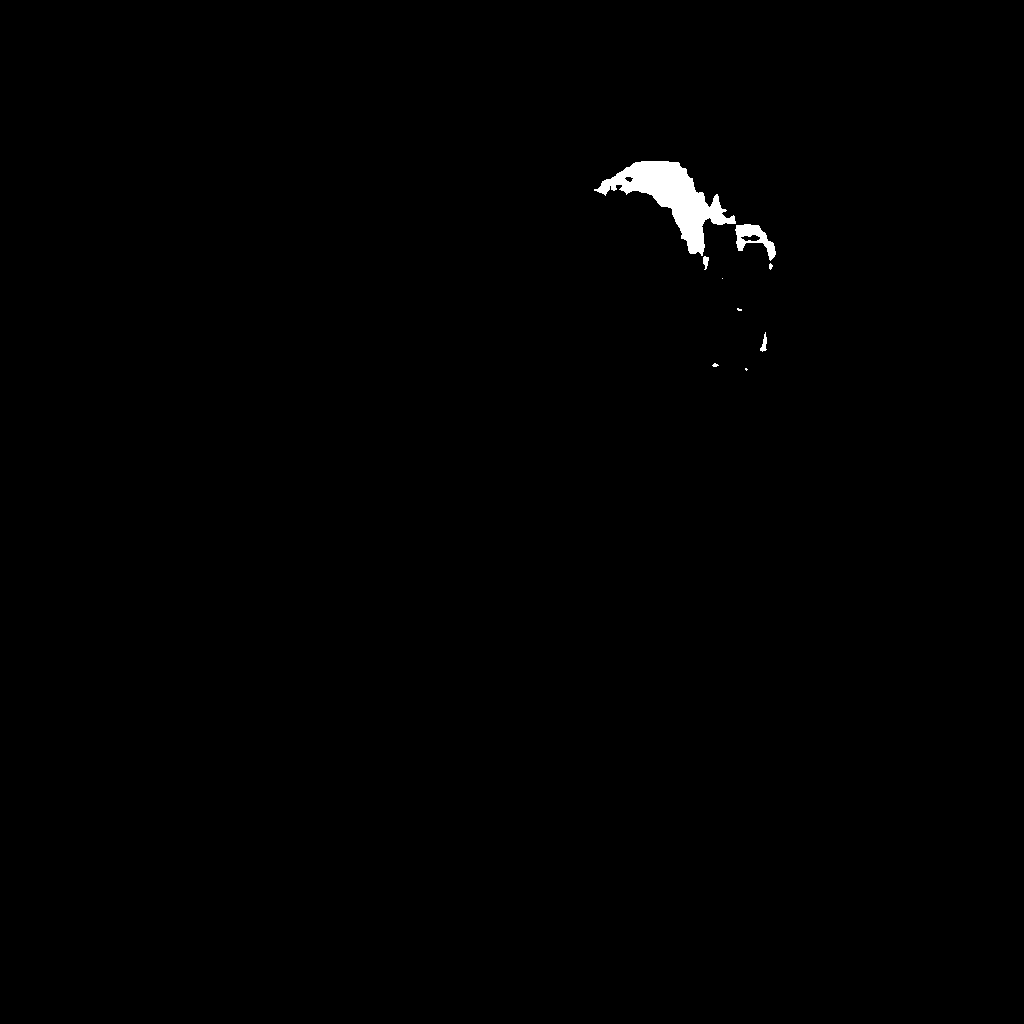

In [11]:
data_dict = {}
image_path = "data/SLAKE/imgs/xmlab329/source.jpg"
image, text = Image.open(image_path), "<image>\nDoes the lung look abnormal?"
data_dict['image'] = image
data_dict['text'] = text
pred_dict = model.predict_forward(**data_dict, tokenizer=tokenizer)
# text description
prediction = pred_dict['prediction']
# segmentation mask
mask = pred_dict['prediction_masks'][0][0]
print(prediction)
Image.fromarray((mask*255).astype('uint8'))

propagate in video: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]

Sure, [SEG]<|end|>


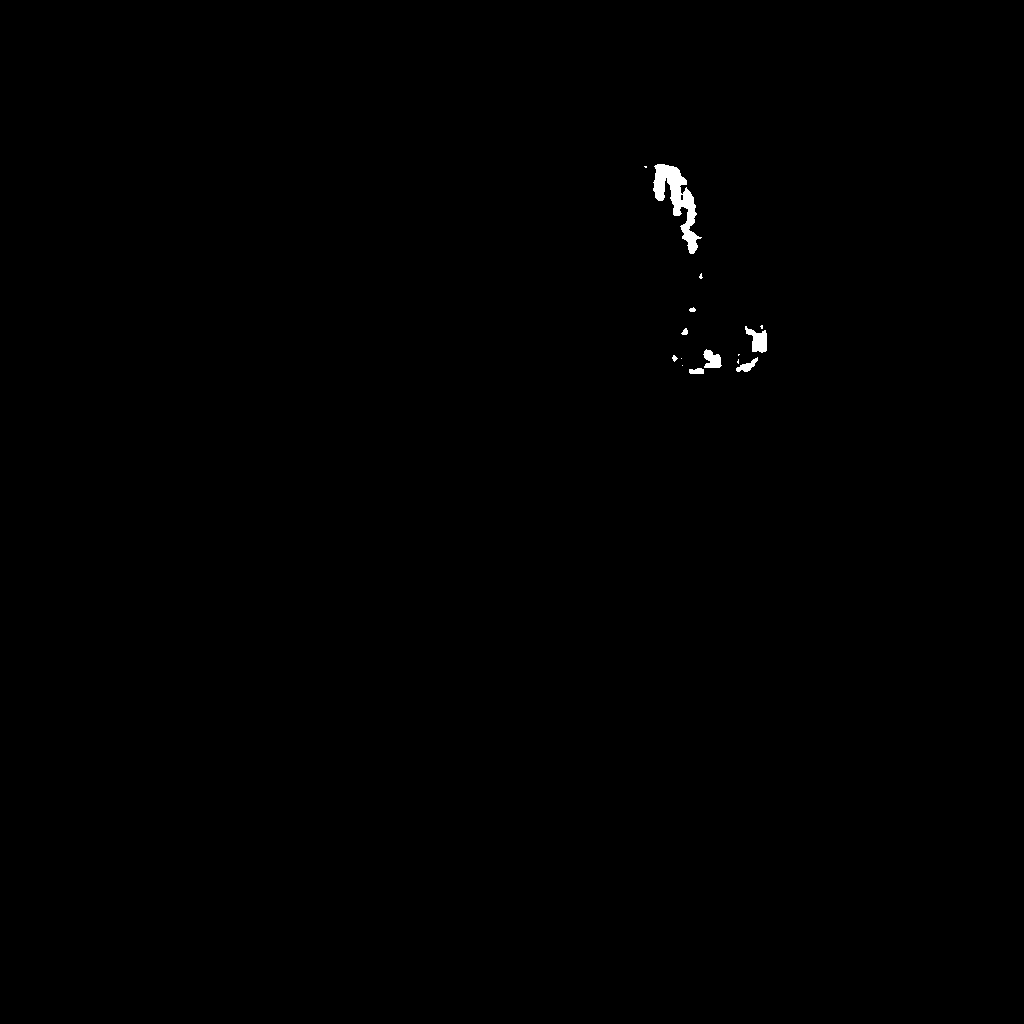

: 

In [ ]:
data_dict = {}
image_path = "data/SLAKE/imgs/xmlab329/source.jpg"
image, text = Image.open(image_path), "<image>\nPlease segment Pulmonary Infiltration."
data_dict['image'] = image
data_dict['text'] = text
pred_dict = model.predict_forward(**data_dict, tokenizer=tokenizer)
# text description
prediction = pred_dict['prediction']
# segmentation mask
mask = pred_dict['prediction_masks'][0][0]
print(prediction)
Image.fromarray((mask*255).astype('uint8'))